## Test $\chi^2$ para histogramas

Correr la demo para el conjunto de 1000 datos primero para mostrar que la hipótesis nula no puede ser rechazada. Tengo dos opciones: 1) medir más datos o 2) dejar de medir y aceptar que no voy a poder rechazar la hipótesis nula. Elijo la opción 1: corro el script para 10000 datos y muestro que se rechaza la hipótesis nula.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
# datos = np.loadtxt('test_chi2_1k.txt') # muestra de 1.000 datos
datos = np.loadtxt('test_chi2_10k.txt') # muestra de 10.000 datos

Histograma

In [3]:
histo, borde_bin = np.histogram(datos, bins=20, range=[-3, 3])
centro_bin = ( borde_bin[0:-1] + borde_bin[1:] ) / 2

Parámetros de la PDF según la hipótesis nula $H_0$ (distribución normal estándar)

In [4]:
mu = 0
sigma = 1

## Plot datos y PDF 

In [5]:
ndatos = len(datos)
ancho_bin = borde_bin[1] - borde_bin[0]
mu = scipy.stats.norm.pdf(centro_bin, loc=mu, scale=sigma)  * ndatos * ancho_bin

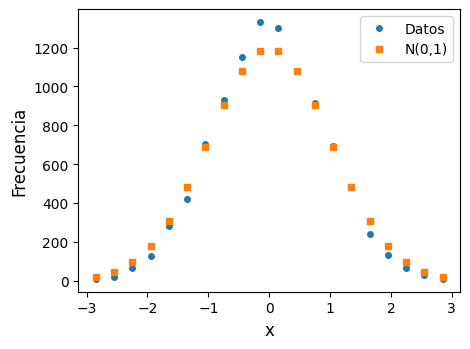

In [21]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel("x")
ax1.set_ylabel("Frecuencia")
ax1.plot(centro_bin, histo, 'o', label="Datos")
ax1.plot(centro_bin, mu, 's', label="N(0,1)")
ax1.legend()
plt.tight_layout()
plt.savefig("test_chi2.svg")
plt.show()

## Estadístico t observado

Selecciono solo los bines con más entradas para que la aproximación Gaussiana al número de entradas del bin sea válida

In [7]:
mu_min = 20

In [8]:
mu_sel = mu[mu>mu_min]
mu_sel

array([  20.61830007,   46.3480414 ,   95.21895551,  178.78411821,
        306.79477369,  481.14998203,  689.64642205,  903.41229646,
       1081.58088738, 1183.43799272, 1183.43799272, 1081.58088738,
        903.41229646,  689.64642205,  481.14998203,  306.79477369,
        178.78411821,   95.21895551,   46.3480414 ,   20.61830007])

In [9]:
print(f'Número de bines seleccionados: {len(mu_sel)}')

Número de bines seleccionados: 20


In [10]:
sigma_sel = np.sqrt(mu_sel)
sigma_sel

array([ 4.54073783,  6.80793959,  9.75802006, 13.37101784, 17.51555805,
       21.93513123, 26.26111997, 30.0568178 , 32.88739709, 34.4011336 ,
       34.4011336 , 32.88739709, 30.0568178 , 26.26111997, 21.93513123,
       17.51555805, 13.37101784,  9.75802006,  6.80793959,  4.54073783])

In [11]:
histo_sel = histo[mu>mu_min]
histo_sel

array([   9,   21,   63,  128,  281,  423,  706,  929, 1151, 1333, 1302,
       1078,  913,  694,  482,  241,  131,   66,   29,    9])

In [12]:
z = (histo_sel-mu_sel) / sigma_sel
z

array([-2.5586811 , -3.72330587, -3.3017923 , -3.79807422, -1.47267781,
       -2.65099768,  0.62272965,  0.85131113,  2.11081201,  4.3475895 ,
        3.44645641, -0.10888327,  0.31898598,  0.16578036,  0.03875144,
       -3.75636183, -3.57370836, -2.99435288, -2.54820731, -2.5586811 ])

In [13]:
t_obs = np.sum(z*z)
print("Estadístico del test observado = ", t_obs)

Estadístico del test observado =  140.31186749439638


## Pvalor

In [14]:
grados_libertad = len(histo_sel)
grados_libertad

20

In [15]:
pvalor = scipy.stats.chi2.sf(t_obs, df=grados_libertad)
print(f'pvalor = {100*pvalor:.1e}%')

pvalor = 4.4e-18%


In [16]:
sigmas = scipy.stats.norm.isf(pvalor)
print(f'nivel de confianza = {sigmas:.1f}σ')

nivel de confianza = 9.1σ


## Distribución del estadístico t

In [17]:
t = np.linspace(0, 2*t_obs, num=1000)
pdf_chi2 = scipy.stats.chi2.pdf(t, df=grados_libertad)

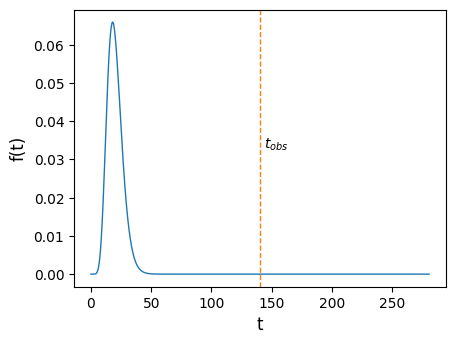

In [18]:
fig2, ax2 = plt.subplots()
ax2.set_xlabel("t")
ax2.set_ylabel("f(t)")
ax2.plot(t, pdf_chi2)
ax2.axvline(t_obs, ls='--', color='tab:orange')
ax2.text(t_obs, 0.5, ' $t_{obs}$',
         transform=ax2.get_xaxis_text1_transform(0)[0])
plt.show()

## Test con librería danatools

Install danatools with: `pip install danatools`

In [19]:
import danatools

In [20]:
tobs, pvalor = danatools.chi_square_test(observed=histo_sel, mean_exp=mu_sel, std_dev_exp=sigma_sel)
print("Estadístico del test observado = ", t_obs)
print(f'pvalor = {100*pvalor:.1e}%')

Estadístico del test observado =  140.31186749439638
pvalor = 4.4e-18%
